Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 1 cost: 0.064520092
Epoch: 2 cost: 0.047817271
Epoch: 3 cost: 0.043387514
Epoch: 4 cost: 0.040843743
Epoch: 5 cost: 0.039328550
Epoch: 6 cost: 0.038335894
Epoch: 7 cost: 0.037503055
Epoch: 8 cost: 0.036860193
Epoch: 9 cost: 0.036233844
Epoch: 10 cost: 0.035791228
Epoch: 11 cost: 0.035377539
Epoch: 12 cost: 0.034993895
Epoch: 13 cost: 0.034730174
Epoch: 14 cost: 0.034324775
Epoch: 15 cost: 0.034138001
Epoch: 16 cost: 0.033833537
Epoch: 17 cost: 0.033728654
Epoch: 18 cost: 0.033572773
Epoch: 19 cost: 0.033423724
Epoch: 20 cost: 0.033299885


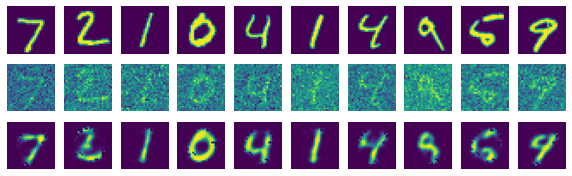

In [2]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Import mnist data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)

# Initialize variabels
batch_size = 100
learning_rate = 0.01
epoch_num = 20
n_input = 28*28
n_hidden1 = 256
n_hidden2 = 256
noise_level = 0.6

# Make model


# Make layer
# Encoding
X_noisy = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32,[None,n_input])

W_encode1 = tf.Variable(tf.random_uniform([n_input,n_hidden1],-1.,1.))
b_encode1 = tf.Variable(tf.random_uniform([n_hidden1],-1.,1.))

encoder_h1 = tf.nn.sigmoid(tf.add(tf.matmul(X_noisy,W_encode1), b_encode1))

W_encode2 = tf.Variable(tf.random_uniform([n_hidden1,n_hidden2],-1.,1.))
b_encode2 = tf.Variable(tf.random_uniform([n_hidden2],-1.,1.))

encoder_h2 = tf.nn.sigmoid(tf.add(tf.matmul(encoder_h1,W_encode2), b_encode2))

W_decode1 = tf.Variable(tf.random_uniform([n_hidden2,n_hidden1],-1.,1.))
b_decode1 = tf.Variable(tf.random_uniform([n_hidden1],-1.,1.))

decoder_h2 = tf.nn.sigmoid(tf.add(tf.matmul(encoder_h2,W_decode1),b_decode1))

W_decode2 = tf.Variable(tf.random_uniform([n_hidden1,n_input],-1.,1.))
b_decode2 = tf.Variable(tf.random_uniform([n_input],-1.,1.))

decoder_h1 = tf.nn.sigmoid(tf.add(tf.matmul(decoder_h2,W_decode2),b_decode2))

cost = tf.reduce_mean(tf.square(Y-decoder_h1))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


# Learning data
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    total_batch = int(mnist.train.num_examples/batch_size)

    for epoch in range(epoch_num):
        avg_cost = 0
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            batch_x_noisy = batch_xs + noise_level * np.random.normal(loc=0.0, scale=1.0, size=batch_xs.shape)
            _, cost_val = sess.run([optimizer, cost], feed_dict={X_noisy: batch_x_noisy, Y: batch_xs})
            avg_cost += cost_val / total_batch
        print('Epoch:', '%d' % (epoch + 1), 'cost:', '{:.9f}'.format(avg_cost))

    test_X = mnist.test.images[:10] + noise_level * np.random.normal(loc=0.0, scale=1.0, size=mnist.test.images[:10].shape)

    # Plot data
    samples = sess.run(decoder_h1, feed_dict={X_noisy: test_X})
    fig, ax = plt.subplots(3, 10, figsize=(10, 3))

    for i in range(10):
        ax[0][i].set_axis_off()
        ax[1][i].set_axis_off()
        ax[2][i].set_axis_off()
        ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        ax[1][i].imshow(np.reshape(test_X[i], (28, 28)))
        ax[2][i].imshow(np.reshape(samples[i], (28, 28)))
    plt.show()